In [126]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [127]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [128]:
%env PLAID_CLIENT_ID=5e8fb3856c40c40013ed1506
%env PLAID_PUBLIC_KEY=178ad444ba035f6cd2a045608cd983
%env PLAID_SBX_SECRET_KEY=d9a3360aa56fe2a1bddbc9273921da

env: PLAID_CLIENT_ID=5e8fb3856c40c40013ed1506
env: PLAID_PUBLIC_KEY=178ad444ba035f6cd2a045608cd983
env: PLAID_SBX_SECRET_KEY=d9a3360aa56fe2a1bddbc9273921da


In [129]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [130]:
INSTITUTION_ID = "ins_109508"

In [131]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

### 2. Generate a public token

In [132]:
create_public_token = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [134]:
exchange_response = client.Item.public_token.exchange(create_public_token['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [135]:
# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': '3l1yZRnaQ7t9W9G5R1GgtkKEbylvE5tqRAKRP',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'xblA6jDoEetgAgxbPzxrfZjDzp7RDwCnB1pBk',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'd4ExRLMKGnCMqME4WlEAFBePmplbPLiZak5aX',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [145]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_data = client.Transactions.get(access_token, start_date, end_date)
print({k for k,v in transaction_data.items()})

{'total_transactions', 'transactions', 'item', 'request_id', 'accounts'}


### 2. Print the categories for each transaction

In [147]:
#pretty_print_response(transaction_data[PLAID_PRODUCTS])
categories = set()
for tansaction in transaction_data[PLAID_PRODUCTS]:
    categories.update(tansaction['category'])

categories

{'Airlines and Aviation Services',
 'Coffee Shop',
 'Credit',
 'Credit Card',
 'Debit',
 'Deposit',
 'Fast Food',
 'Food and Drink',
 'Gyms and Fitness Centers',
 'Payment',
 'Recreation',
 'Restaurants',
 'Shops',
 'Sporting Goods',
 'Taxi',
 'Transfer',
 'Travel'}

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [151]:
transaction_df = pd.DataFrame(transaction_data[PLAID_PRODUCTS], columns=['date','name','amount', 'category'])
transaction_df['category'] = transaction_df['category'].apply(lambda x: x[0])
transaction_df

,date,name,amount,category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
1,2020-04-15,Uber,5.40,Travel
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.00,Transfer
4,2020-04-13,Touchstone Climbing,78.50,Recreation
5,2020-04-13,United Airlines,-500.00,Travel
6,2020-04-12,McDonald's,12.00,Food and Drink
7,2020-04-12,Starbucks,4.33,Food and Drink
8,2020-04-11,SparkFun,89.40,Food and Drink
9,2020-04-10,INTRST PYMNT,-4.22,Transfer


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [152]:
transaction_df['amount'] = transaction_df['amount'].astype(float)
transaction_df['date'] = pd.to_datetime(transaction_df['date'], infer_datetime_format=True)
transaction_df.set_index('date', inplace=True)
transaction_df.head()

,name,amount,category
date,,,
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2020-04-15,Uber,5.4,Travel
2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
2020-04-13,Touchstone Climbing,78.5,Recreation


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [153]:
# Fetch income data using access_token
income_data = client.Income.get(access_token)['income']

# The previous year's gross income 
print(f"The Previous year's gross income : {income_data['last_year_income_before_tax']*1.00}$")

# The current monthly income
print(f"The Current monthly income : {income_data['income_streams'][0]['monthly_income']*1.00}$")

# The projected yearly income
print(f"The Projected yearly income : {income_data['projected_yearly_income']*1.00}$")

The Previous year's gross income : 7285.0$
The Current monthly income : 500.0$
The Projected yearly income : 6085.0$


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4e8bdfd10>],
      dtype=object)

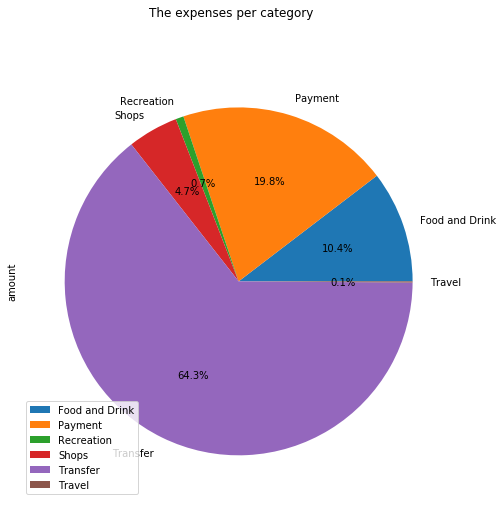

In [154]:
expenses_per_category = transaction_df.groupby('category').sum()
expenses_per_category.plot.pie(figsize=(8,8),subplots=True,title='The expenses per category', autopct='%.1f%%')

### Generate a bar chart with the number of transactions for each category

[Text(0, 0.5, 'count')]

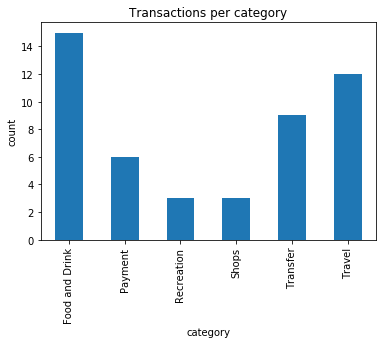

In [155]:
transactions_per_category = transaction_df.groupby('category').count()[['name']]
transactions_per_category.columns = ['count']
ax = transactions_per_category.plot.bar(title='Transactions per category', legend=False)
ax.set(ylabel='count')

### Calculate the expenses per month

In [156]:
# Calculating the sum of expenses for every month
expenses_per_month = transaction_df.groupby(pd.Grouper(freq='M')).sum()

# Convert the date column into date type 
expenses_per_month.reset_index(inplace=True)
expenses_per_month['date'] = pd.to_datetime(expenses_per_month['date'], infer_datetime_format=True)
expenses_per_month.set_index('date', inplace=True)


[Text(0, 0.5, 'amount'), Text(0.5, 0, 'month')]

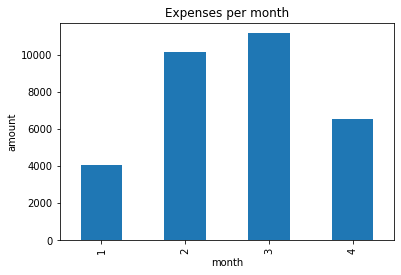

In [157]:
# Plot the bar chart for the expenses per month
ax = expenses_per_month.plot.bar(legend=False, title='Expenses per month')
ax.set_xticklabels(pd.DatetimeIndex(expenses_per_month.index).month)
ax.set(xlabel='month', ylabel='amount')